In [1]:
import os
from scipy import misc
import random
import numpy as np
import keras
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
from keras.models import load_model
model = load_model('mymodel.h5')

In [3]:
file_dirs = []
for root, dirs, files in os.walk("/home/vietdoan/Downloads/Parking lots/PKLot/PKLotSegmented/UFPR04", topdown=False):
    for name in files:
        file_dirs.append(os.path.join(root, name))

In [4]:
random.shuffle(file_dirs)
x_val = []
y_val = []
for i in range(0, 10000):
    f = misc.imread(file_dirs[i])
    f = misc.imresize(f, (48, 64))
    x_val.append(f)
    folders = file_dirs[i].split('/')
    label = 1 if folders[len(folders) - 2] == 'Occupied' else 0
    y_val.append(label)

In [5]:
x_val = np.array(x_val)
x_val = x_val.astype('float32')
x_val /= 255

In [6]:
y_val = np.array(y_val)
y_val = keras.utils.to_categorical(y_val, 2)


In [7]:
prediction = model.predict(x_val)

In [8]:
acc_val = np.mean(np.round(prediction) == y_val)
acc_val

0.99909999999999999

In [20]:
prediction = np.round(prediction)
id = []
for i in range(0, 10000):
    if prediction[i][0] != y_val[i][0]:
        id.append(i)
id

[795, 2747, 2750, 3190, 4015, 4233, 4944, 6707, 8597]

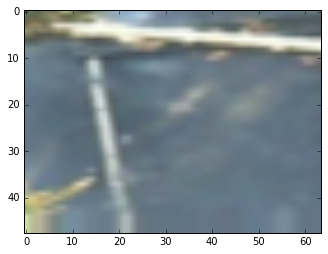

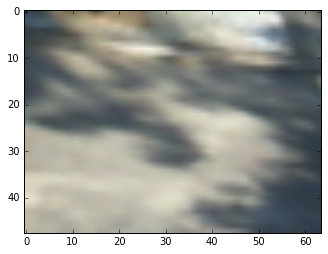

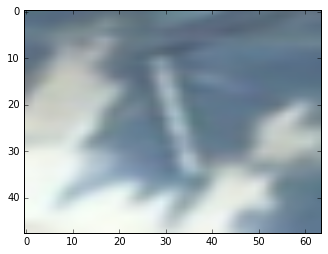

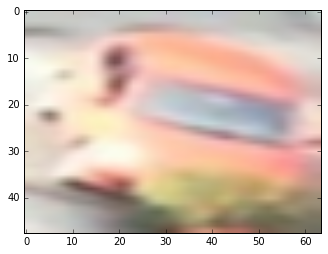

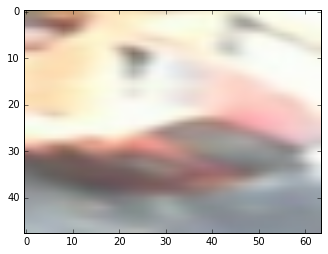

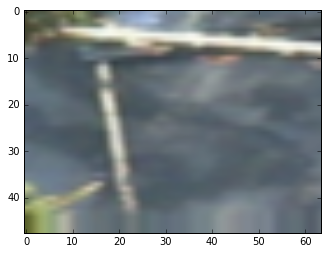

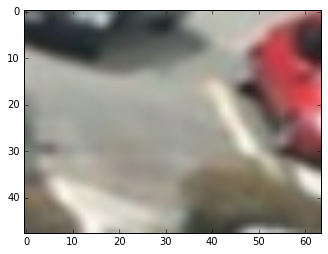

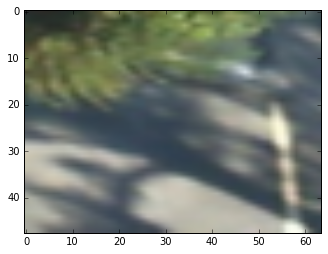

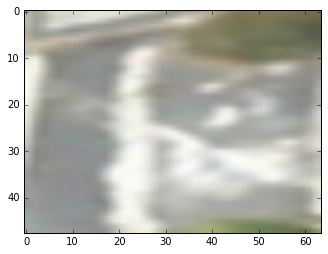

In [24]:
import matplotlib.pyplot as plt
for i in id:
    f = misc.imread(file_dirs[i])
    f = misc.imresize(f, (48, 64))
    plt.imshow(f)
    plt.show()